In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel("GSAF5.xls")
dfcopy = df.copy()
dfcopy.columns = dfcopy.columns.str.lower().str.replace(" ", "_")

In [2]:
import warnings
warnings.filterwarnings("ignore")

### ELIMINO COLUMNAS 21 Y 22 XQ ESTAN LLENAS DE NAN

In [3]:
dfcopy.drop("unnamed:_21", axis=1, inplace=True)
dfcopy.drop("unnamed:_22", axis=1, inplace=True)
dfcopy.drop("href_formula", axis=1, inplace=True)
dfcopy.drop("href", axis=1, inplace=True)
dfcopy.drop("case_number", axis=1, inplace=True)
dfcopy.drop("case_number.1", axis=1, inplace=True)
dfcopy.drop("pdf", axis=1, inplace=True)


### CAMBIO "NAN" POR "0" Y EL TYPE DE "FLOAT" A "INT" EN YEAR

In [4]:
dfcopy["year"].fillna(0, inplace=True)

In [5]:
dfcopy['year'] = dfcopy['year'].astype(int)

### CAMBIO ?, NAN POR INVALID Y PASO A MINUSCULAS Y _ EN TYPE

In [6]:
dfcopy["type"] = dfcopy["type"].str.replace("?", "Invalid")

In [7]:
dfcopy["type"].fillna("invalid", inplace=True)

In [8]:
dfcopy['type'] = dfcopy['type'].str.lower().str.replace(" ", "_")

In [9]:
dfcopy["year"].fillna("invalid", inplace=True)

### 

In [10]:
dfcopy['country'].fillna("no_country", inplace=True)

In [11]:
dfcopy['country'] = dfcopy['country'].str.lower().str.replace(" ", "_")

### CAMBIO LOS NAN A NO_STATE CAMBIO A MINUSCULAS Y _ Y QUITO _ QUE APARECEN AL PRINCIPIO

In [12]:
dfcopy['state'].fillna("no_state", inplace=True)

In [13]:
dfcopy['state'] = dfcopy['state'].str.lower().str.replace(" ", "_")

In [14]:
dfcopy['state'] = dfcopy['state'].str.lstrip('_')

### SIGO LIMPIANDO COLUMNAS

In [15]:
dfcopy['location'].fillna("no_location", inplace=True)

In [16]:
dfcopy['location'] = dfcopy['location'].str.lower().str.replace(" ", "_")

### LIMPIO LA COLUMNA AGE

In [17]:
dfcopy['age'].fillna(0, inplace=True)

In [18]:
dfcopy['age'] = dfcopy['age'].str.replace("30s", "35").str.replace("20/30", "25").str.replace("20s", "25").str.replace("!2", "2").str.replace("50s", "55").str.replace("40s", "45").str.replace("teen", "15").str.replace("Teen", "15").str.replace("M", "0").str.replace("!6", "6").str.replace("!!", "0").str.replace("45 and 15", "30").str.replace("28 & 22", "25").str.replace("60s", "65").str.replace("20's", "25").str.replace("9 & 60", "35").str.replace("a minor", "9").str.replace("18 months", "1").str.replace("28 & 26", "27").str.replace("18 or 20", "19").str.replace("12 or 13", "12").str.replace("46 & 34", "40").str.replace("23 & 30", "26").str.replace("36 & 26", "31").str.replace("8 or 10", "9").str.replace("\xa0 ", "0").str.replace("30 or 36", "33").str.replace("6½", "6").str.replace("21 & ?", "21").str.replace("33 or 37", "35").str.replace("mid-30s", "35").str.replace("23 & 20", "21").str.replace("7      &    31", "19").str.replace("20?", "20").str.replace("60's", "65").str.replace("32 & 30", "31").str.replace("16 to 18", "17").str.replace("Elderly", "0").str.replace("mid-20s", "25").str.replace("Ca. 33", "33").str.replace("21 or 26", "23").str.replace(">50", "55").str.replace("18 to 22", "20").str.replace("adult", "0").str.replace("33 & 37", "35").str.replace("25 or 28", "26").str.replace("? & 27", "27").str.replace("24 & 35", "29").str.replace("30 & 32", "31").str.replace("50 & 30", "40").str.replace("17 & 35", "26").str.replace("X", "0").str.replace("middle-age", "40").str.replace("13 or 18", "15").str.replace("34 & 19", "27").str.replace("33 & 26", "29").str.replace("2 to 3 months", "0").str.replace("MAKE LINE GREEN", "0").str.replace("young", "17").str.replace("7 or 8", "7").str.replace("17 & 16", "16").str.replace("F", "0").str.replace("Both 11", "11").str.replace("9 or 10", "9").str.replace("36 & 23", "29").str.replace("A.M.", "0").str.replace("?    &   14", "14").str.replace("10 or 12", "11").str.replace("31 or 33", "32").str.replace("2½", "2").str.replace("13 or 14", "13")

In [19]:
dfcopy['age'].fillna(0, inplace=True)

In [20]:
dfcopy['age'] = dfcopy['age'].astype(str)

In [21]:
valores_no_numericos = dfcopy['age'][~dfcopy['age'].str.isnumeric()]

In [22]:
dfcopy['age'] = dfcopy['age'].str.replace("15s", "15").str.replace("22, 57, 31", "36").str.replace("28, 26", "27").str.replace("mid-35", "35").str.replace("30", "30").str.replace("28", "28").str.replace("mid-25", "25").str.replace("74 ", "74").str.replace("45 ", "45").str.replace("20 ", "20").str.replace("9 & 12", "10").str.replace("? & 19", "19").str.replace("9 months", "1").str.replace("25 to 35", "30").str.replace("(0)", "0").str.replace("37, 67, 35, 27,  27", "38").str.replace("21, 34,29", "28").str.replace("40", "40").str.replace("0AKE LINE GREEN", "0").str.replace("43", "43").str.replace("17", "17").str.replace("A.0.", "0")

In [23]:
dfcopy['age'] = dfcopy['age'].str.replace('""', "")

In [24]:
dfcopy['age'] = dfcopy['age'].str.replace("23 & 26", "24").str.replace('"17"', "17").str.replace('"40"', "40")

In [25]:
dfcopy['age'] = dfcopy['age'].str.replace("  ", "0").str.replace(" 43", "43").str.replace(" 28", "28").str.replace(" 30", "30")

In [26]:
dfcopy['age'] = dfcopy['age'].str.replace(" ", "0")

In [27]:
dfcopy['age'] = dfcopy['age'].astype(int)

In [28]:
dfcopy["name"].value_counts()

name
male               677
female             135
boy                 23
2 males             17
boat                14
                  ... 
Richard Horton       1
C.K.                 1
John McGovern        1
Martin Gunda         1
Jules Patterson      1
Name: count, Length: 5678, dtype: int64

In [29]:
dfcopy["activity"].fillna("undefined", inplace=True)

In [30]:
from dateutil import parser
def convert_to_datetime(value):
    try:
        return parser.parse(str(value)).strftime('%H:%M')
    except:
        return pd.NaT

dfcopy['time'] = dfcopy['time'].apply(convert_to_datetime)


In [31]:
import datetime
trash_words = ['Reported','Reprted','reported','before','Before','Late']
dfcopy['date'] = dfcopy['date'].astype(str)
dfcopy = dfcopy[~dfcopy['date'].map(lambda x: x in trash_words)]
dfcopy['date'] = pd.to_datetime(dfcopy['date'], errors='coerce')

tengo un dataframe dfcopy y quiero rellenar los valores Nan que hay en la columna time con los valores que hay en la columna year dame el codigo

In [32]:
dfcopy.drop_duplicates(keep="first", inplace= True)

In [33]:
def convert_to_datetime(value):
    try:
        return parser.parse(str(value)).strftime('%H:%M')
    except:
        return pd.NaT
dfcopy['time'] = dfcopy['time'].apply(convert_to_datetime)
dfcopy['time'] = pd.to_datetime(dfcopy['time'], format='%H:%M', errors='coerce')

In [34]:
dfcopy["name"].unique()

array(['Michael Smith', 'male', 'Murray Adams', ..., 'A "chiefess"',
       'Ahmun', 'Jules Patterson'], dtype=object)

In [35]:
dfcopy['name'].fillna("undefined", inplace=True)

In [36]:
dfcopy.rename(columns={'unnamed:_11': 'survived'}, inplace=True)

In [37]:
dfcopy['survived'].fillna("undefined", inplace=True)

In [38]:
dfcopy['survived'].unique()

array(['N', 'Y', 'M', 'undefined', 'F', 'n', 'Nq', 'UNKNOWN', 2017,
       'Y x 2', ' N', 'N ', 'y'], dtype=object)

In [39]:
map_function = lambda x: "yes" if str(x).strip().lower() == 'y' else ("no" if str(x).strip().lower() == 'n' else "undefined")
dfcopy["survived"] = dfcopy["survived"].map(map_function)

In [40]:
dfcopy.rename(columns={'species_': 'species'}, inplace=True)

In [41]:
dfcopy["sex"].unique()

array(['M', 'F', nan, ' M', 'M ', 'lli', 'M x 2', 'N', '.'], dtype=object)

In [42]:
dfcopy["species"].fillna("undefined", inplace=True)

In [43]:
dfcopy["source"].fillna("undefined", inplace=True)

In [44]:
dfcopy["injury"].fillna("undefined", inplace=True)

In [45]:
map_function = lambda x: "male" if str(x).strip().lower() == 'm' else ("female" if str(x).strip().lower() == 'f' else "undefined")
dfcopy["sex"] = dfcopy["sex"].map(map_function)

In [46]:
dfcopy["original_order"].fillna(0, inplace=True)

In [47]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6935 entries, 0 to 6934
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6054 non-null   datetime64[ns]
 1   year            6935 non-null   int32         
 2   type            6935 non-null   object        
 3   country         6935 non-null   object        
 4   state           6935 non-null   object        
 5   location        6935 non-null   object        
 6   activity        6935 non-null   object        
 7   name            6935 non-null   object        
 8   sex             6935 non-null   object        
 9   age             6935 non-null   int32         
 10  injury          6935 non-null   object        
 11  survived        6935 non-null   object        
 12  time            2722 non-null   datetime64[ns]
 13  species         6935 non-null   object        
 14  source          6935 non-null   object        
 15  original_

### hasta aqui he limpiado los datos


In [48]:
age_group = []
for edad in dfcopy["age"]:
        if 0 < edad <= 12:
            age_group.append('Niño')
        elif 12 < edad <=18:
            age_group.append('Adolescente')
        elif 8 < edad <= 60:
            age_group.append('Adulto')
        elif edad > 60:
            age_group.append('Adulto Mayor')
        elif edad == 0:
            age_group.append("undefined")
        else:
            age_group.append("undefined")
age_group

dfcopy["age_group"] = age_group

In [49]:
year_group = []
for year in dfcopy["year"]:
        if 0 < year <= 1924:
            year_group.append('antes de 1924')
        elif 1924 < year <=1934:
            year_group.append("1924-34")
        elif 1934 < year <= 1944:
            year_group.append('1934-44')
        elif 1934 < year <= 1954:
            year_group.append('1944-54')
        elif 1934 < year <= 1964:
            year_group.append('1954-64')
        elif 1934 < year <= 1974:
            year_group.append('1964-74')
        elif 1934 < year <= 1984:
            year_group.append('1974-84')
        elif 1934 < year <= 1994:
            year_group.append('1984-94')
        elif 1934 < year <= 2004:
            year_group.append('1994-04')
        elif 1934 < year <= 2014:
            year_group.append('2004-14')
        elif 1934 < year <= 2024:
            year_group.append('2014-24')
        elif year == 0:
            year_group.append("undefined")
        else:
            year_group.append("undefined")
year_group

dfcopy["year_group"] = year_group

In [50]:
country_mapping = {
    'bahrain': 'Bahrain',
    'bahamas': 'Bahamas',
    'australia': 'Australia',
    'south_africa': 'South Africa',
    'usa': 'USA',
    'mexico': 'Mexico',
    'new_zealand': 'New Zealand',
    'egypt': 'Egypt',
    'belize': 'Belize',
    'philippines': 'Philippines',
    'coral_sea': 'Coral Sea',
    'spain': 'Spain',
    'portugal': 'Portugal',
    'colombia': 'Colombia',
    'ecuador': 'Ecuador',
    'french_polynesia': 'French Polynesia',
    'new_caledonia': 'New Caledonia',
    'turks_and_caicos': 'Turks and Caicos',
    'brazil': 'Brazil',
    'seychelles': 'Seychelles',
    'argentina': 'Argentina',
    'fiji': 'Fiji',
    'maldives': 'Maldives',
    'england': 'England',
    'japan': 'Japan',
    'indonesia': 'Indonesia',
    'jamaica': 'Jamaica',
    'thailand': 'Thailand',
    'columbia': 'Colombia',
    'costa_rica': 'Costa Rica',
    'british_overseas_territory': 'British Overseas Territory',
    'canada': 'Canada',
    'jordan': 'Jordan',
    'st_kitts_/_nevis': 'St. Kitts and Nevis',
    'st_martin': 'St. Martin',
    'papua_new_guinea': 'Papua New Guinea',
    'reunion_island': 'Reunion Island',
    'israel': 'Israel',
    'china': 'China',
    'samoa': 'Samoa',
    'ireland': 'Ireland',
    'italy': 'Italy',
    'malaysia': 'Malaysia',
    'libya': 'Libya',
    'no_country': 'Undefined',
    'cuba': 'Cuba',
    'mauritius': 'Mauritius',
    'solomon_islands': 'Solomon Islands',
    'st_helena,_british_overseas_territory': 'St. Helena, British Overseas Territory',
    'comoros': 'Comoros',
    'reunion': 'Reunion',
    'united_kingdom': 'United Kingdom',
    'united_arab_emirates': 'United Arab Emirates',
    'cape_verde': 'Cape Verde',
    'dominican_republic': 'Dominican Republic',
    'cayman_islands': 'Cayman Islands',
    'aruba': 'Aruba',
    'mozambique': 'Mozambique',
    'puerto_rico': 'Puerto Rico',
    'atlantic_ocean': 'Atlantic Ocean',
    'greece': 'Greece',
    'st._martin': 'St. Martin',
    'france': 'France',
    'trinidad_&_tobago': 'Trinidad & Tobago',
    'kiribati': 'Kiribati',
    'diego_garcia': 'Diego Garcia',
    'taiwan': 'Taiwan',
    'palestinian_territories': 'Palestinian Territories',
    'guam': 'Guam',
    'nigeria': 'Nigeria',
    'tonga': 'Tonga',
    'scotland': 'Scotland',
    'croatia': 'Croatia',
    'saudi_arabia': 'Saudi Arabia',
    'chile': 'Chile',
    'antigua': 'Antigua',
    'kenya': 'Kenya',
    'russia': 'Russia',
    'turks_&_caicos': 'undefined',
    'united_arab_emirates_': 'United Arab Emirates',
    'azores': 'Azores',
    'south_korea': 'South Korea',
    'malta': 'Malta',
    'vietnam': 'Vietnam',
    'madagascar': 'Madagascar',
    'panama': 'Panama',
    'somalia': 'Somalia',
    'nevis': 'Nevis',
    'british_virgin_islands': 'British Virgin Islands',
    'norway': 'Norway',
    'senegal': 'Senegal',
    'yemen': 'Yemen',
    'gulf_of_aden': 'Gulf of Aden',
    'sierra_leone': 'Sierra Leone',
    'st._maartin': 'St. Maartin',
    'grand_cayman': 'Grand Cayman',
    'liberia': 'Liberia',
    'vanuatu': 'Vanuatu',
    'mexico_': 'Mexico',
    'honduras': 'Honduras',
    'venezuela': 'Venezuela',
    'sri_lanka': 'Sri Lanka',
    '_tonga': 'Tonga',
    'uruguay': 'Uruguay',
    'india': 'India',
    'micronesia': 'Micronesia',
    'caribbean_sea': 'Caribbean Sea',
    'okinawa': 'Okinawa',
    'tanzania': 'Tanzania',
    'marshall_islands': 'Marshall Islands',
    'egypt_/_israel': 'Egypt / Israel',
    'northern_arabian_sea': 'Northern Arabian Sea',
    'hong_kong': 'Hong Kong',
    'el_salvador': 'El Salvador',
    'angola': 'Angola',
    'bermuda': 'Bermuda',
    'montenegro': 'Montenegro',
    'iran': 'Iran',
    'tunisia': 'Tunisia',
    'namibia': 'Namibia',
    'north_atlantic_ocean': 'North Atlantic Ocean',
    'south_china_sea': 'South China Sea',
    'bangladesh': 'Bangladesh',
    'palau': 'Palau',
    'western_samoa': 'Western Samoa',
    'pacific_ocean_': 'Pacific Ocean',
    'british_isles': 'British Isles',
    'grenada': 'Grenada',
    'iraq': 'Iraq',
    'turkey': 'Turkey',
    'singapore': 'Singapore',
    'new_britain': 'New Britain',
    'sudan': 'Sudan',
    'johnston_island': 'Johnston Island',
    'south_pacific_ocean': 'South Pacific Ocean',
    'new_guinea': 'New Guinea',
    'red_sea': 'Red Sea',
    'north_pacific_ocean': 'North Pacific Ocean',
    'federated_states_of_micronesia': 'Federated States of Micronesia',
    'mid_atlantic_ocean': 'Mid Atlantic Ocean',
    'admiralty_islands': 'Admiralty Islands',
    'british_west_indies': 'British West Indies',
    'south_atlantic_ocean': 'South Atlantic Ocean',
    'persian_gulf': 'Persian Gulf',
    'red_sea_/_indian_ocean': 'Red Sea',
    'pacific_ocean': 'Pacific Ocean',
    'north_sea': 'North Sea',
    'nicaragua_': 'Nicaragua',
    'maldive_islands': 'Maldive Islands',
    'american_samoa': 'American Samoa',
    'andaman_/_nicobar_islandas': 'Andaman / Nicobar Islands',
    'gabon': 'Gabon',
    'mayotte': 'Mayotte',
    'north_atlantic_ocean_': 'North Atlantic Ocean',
    'the_balkans': 'The Balkans',
    'sudan?': 'Sudan',
    'martinique': 'Martinique',
    'indian_ocean': 'Indian Ocean',
    'guatemala': 'Guatemala',
    'netherlands_antilles': 'Netherlands Antilles',
    'northern_mariana_islands': 'Northern Mariana Islands',
    'iran_/_iraq': 'Iran / Iraq',
    'java': 'undefined',
    '_philippines': 'Philippines',
    'nicaragua': 'Nicaragua',
    'central_pacific': 'Central Pacific',
    'solomon_islands_/_vanuatu': 'Solomon Islands / Vanuatu',
    'southwest_pacific_ocean': 'Southwest Pacific Ocean',
    'bay_of_bengal': 'Bay of Bengal',
    'mid-pacifc_ocean': 'Mid-Pacific Ocean',
    'slovenia': 'Slovenia',
    'curacao': 'Curacao',
    'iceland': 'Iceland',
    'italy_/_croatia': 'Italy / Croatia',
    'barbados': 'Barbados',
    'monaco': 'Monaco',
    'guyana': 'Guyana',
    'haiti': 'Haiti',
    'san_domingo': 'San Domingo',
    'kuwait': 'Kuwait',
    'yemen_': 'Yemen',
    'falkland_islands': 'Falkland Islands',
    'crete': 'Crete',
    'cyprus': 'Cyprus',
    'egypt_': 'Egypt',
    'west_indies': 'West Indies',
    'burma': 'Burma',
    'lebanon': 'Lebanon',
    'paraguay': 'Paraguay',
    'british_new_guinea': 'British New Guinea',
    'ceylon': 'Ceylon',
    'ocean': 'Undefined',
    'georgia': 'Georgia',
    'syria': 'Syria',
    'tuvalu': 'Tuvalu',
    'indian_ocean?': 'Indian Ocean',
    'guinea': 'Guinea',
    'andaman_islands': 'Andaman Islands',
    'equatorial_guinea_/_cameroon': 'Equatorial Guinea / Cameroon',
    'cook_islands': 'Cook Islands',
    'tobago': 'Tobago',
    'peru': 'Peru',
    'africa': 'Africa',
    'algeria': 'Algeria',
    'coast_of_africa': 'Coast of Africa',
    'tasman_sea': 'Tasman Sea',
    'ghana': 'Ghana',
    'greenland': 'Greenland',
    'mediterranean_sea': 'Mediterranean Sea',
    'sweden': 'Sweden',
    'roatan': 'Roatan',
    'between_portugal_&_india': 'Between Portugal & India',
    'djibouti': 'Djibouti',
    'bahrein': 'Bahrain',
    'korea': 'Korea',
    'red_sea?': 'Red Sea',
    'asia?': 'Asia',
    'ceylon_(sri_lanka)': 'Ceylon (Sri Lanka)'
}


    
dfcopy["country"] = dfcopy["country"].map(country_mapping).fillna('undefined')


In [51]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6935 entries, 0 to 6934
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6054 non-null   datetime64[ns]
 1   year            6935 non-null   int32         
 2   type            6935 non-null   object        
 3   country         6935 non-null   object        
 4   state           6935 non-null   object        
 5   location        6935 non-null   object        
 6   activity        6935 non-null   object        
 7   name            6935 non-null   object        
 8   sex             6935 non-null   object        
 9   age             6935 non-null   int32         
 10  injury          6935 non-null   object        
 11  survived        6935 non-null   object        
 12  time            2722 non-null   datetime64[ns]
 13  species         6935 non-null   object        
 14  source          6935 non-null   object        
 15  original_

In [53]:
dfa = dfcopy[dfcopy['age'] != 0].groupby("country")["age"].mean().sort_values()

In [54]:
dfa.reset_index()
dfa

country
Grenada                   14.250000
Iraq                      14.666667
Cyprus                    15.000000
Ceylon (Sri Lanka)        15.000000
Indonesia                 15.666667
                            ...    
Azores                    49.000000
France                    50.000000
British Virgin Islands    53.000000
St. Maartin               55.000000
Grand Cayman              57.000000
Name: age, Length: 107, dtype: float64

In [55]:
dfa = dfcopy[dfcopy['age'] != 0].groupby("country")["age"].mean().sort_values()

In [56]:
dfa.reset_index()
dfa

country
Grenada                   14.250000
Iraq                      14.666667
Cyprus                    15.000000
Ceylon (Sri Lanka)        15.000000
Indonesia                 15.666667
                            ...    
Azores                    49.000000
France                    50.000000
British Virgin Islands    53.000000
St. Maartin               55.000000
Grand Cayman              57.000000
Name: age, Length: 107, dtype: float64

### TODOS LOS PAISES / EDAD MEDIA

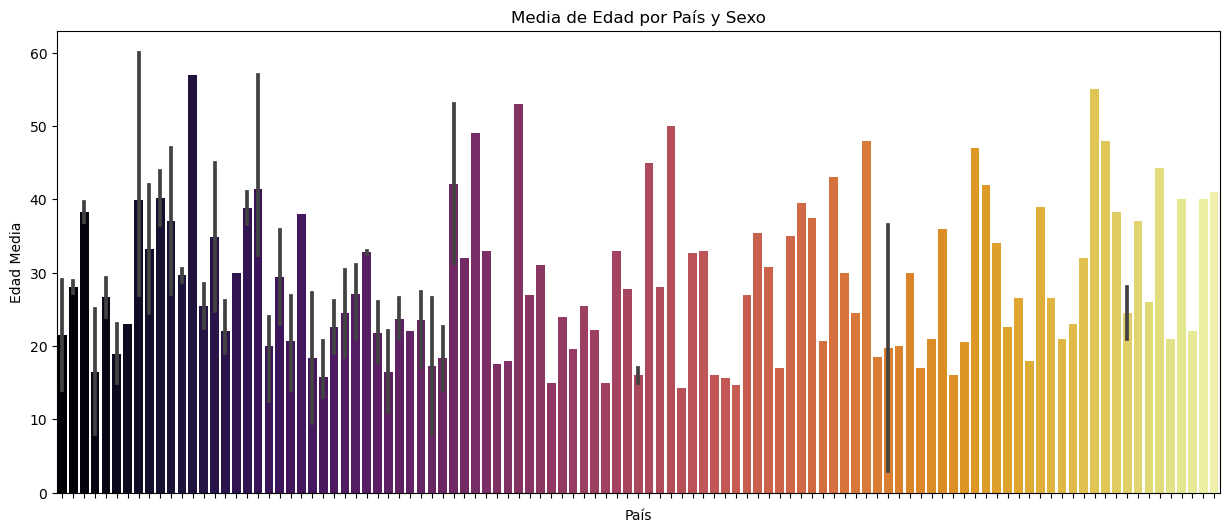

In [57]:
df_pivot2 = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'max', 'min', 'count'))
df_pivot2_reset = df_pivot2.reset_index()
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='country', y='mean', data=df_pivot2_reset, palette='inferno')
ax.set_xticklabels([])
plt.title('Media de Edad por País y Sexo')
plt.xlabel('País')
plt.ylabel('Edad Media')
plt.show()


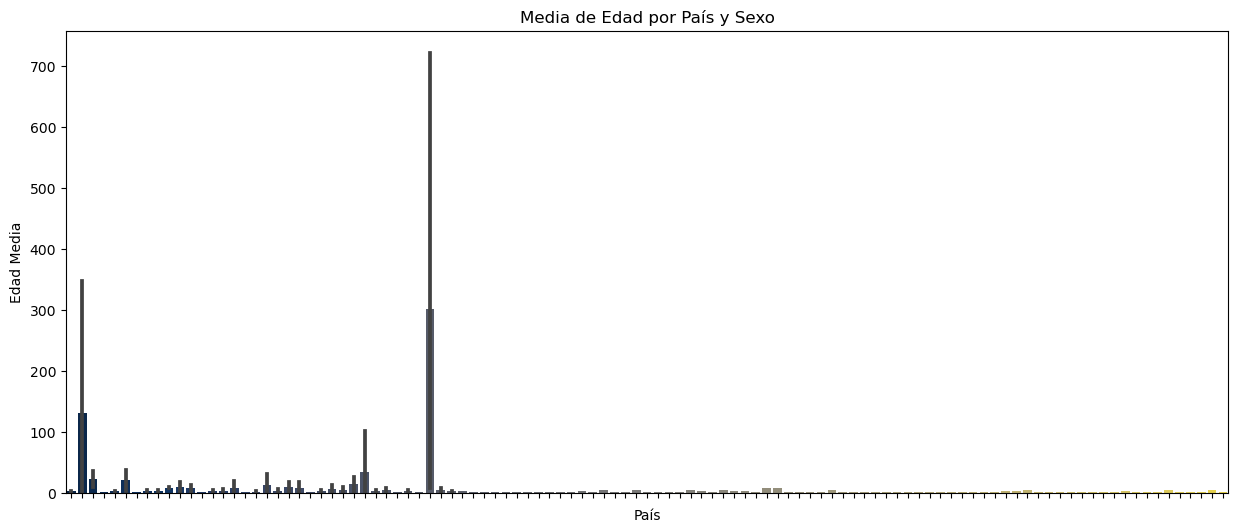

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='country', y='count', data=df_pivot2_reset, palette='cividis')
ax.set_xticklabels([])
plt.title('Media de Edad por País y Sexo')
plt.xlabel('País')
plt.ylabel('Edad Media')
plt.show()


In [59]:
df_pivot2 = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'max', 'min'))
df_pivot2

max       mean  min
sex       country                              
female    Atlantic Ocean     27  14.000000    1
          Australia          64  27.186047    2
          Bahamas            73  39.700000   20
          Belize              8   8.000000    8
          Bermuda            29  24.000000   19
...                         ...        ...  ...
undefined Pacific Ocean       3   3.000000    3
          Papua New Guinea   14  13.500000   13
          South Africa       31  31.000000   31
          Thailand           28  28.000000   28
          USA                36  17.125000    9

[151 rows x 3 columns]

In [60]:
df_pivot = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'count', 'max', 'min'))
df_pivot_filtered = df_pivot[df_pivot['count'] > 25]
df_pivot_filtered

count  max       mean  min
sex    country                                 
female Australia        43   64  27.186047    2
       USA             176   77  26.221591    2
male   Australia       347   78  28.809798    5
       Bahamas          35   77  36.971429   10
       Brazil           38   43  22.947368   12
       Mexico           30   66  32.366667   10
       Reunion          26   52  30.384615   13
       South Africa    101   74  29.128713   13
       USA             721   87  27.421637    3

### EDAD MEDIA / PAISES CON MAS DE 25 CASOS

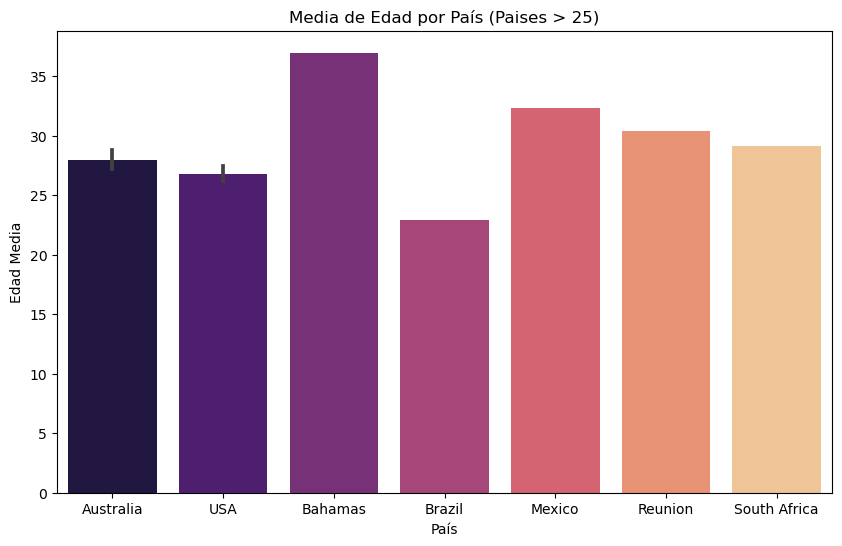

In [61]:
df_pivot = pd.pivot_table(dfcopy[dfcopy['age'] != 0], values='age', index=('sex', 'country'), aggfunc=('mean', 'count', 'max', 'min'))
df_pivot_filtered = df_pivot[df_pivot['count'] > 25]
df_pivot_filtered_reset = df_pivot_filtered.reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='country', y='mean', data=df_pivot_filtered_reset, palette='magma')
plt.title('Media de Edad por País (Paises > 25)')
plt.xlabel('País')
plt.ylabel('Edad Media')
plt.show()


In [62]:
df_filtered_age = dfcopy[dfcopy['age'] != 0]
df_pivot11 = pd.pivot_table(df_filtered_age, values='age', columns='year_group', index='country', aggfunc=('count'))
df_pivot_filtered11 = df_pivot11[df_pivot11.sum(axis=1) > 10]
df_pivot_filtered11_reset = df_pivot_filtered11.reset_index().assign(count=df_pivot_filtered11.sum(axis=1))
df_pivot_filtered11_top10 = df_pivot_filtered11_reset.sort_values(by='count', ascending=False)
df_pivot_filtered11_top10


year_group,country,1924-34,1934-44,1944-54,1954-64,1964-74,1974-84,1984-94,1994-04,2004-14,2014-24,antes de 1924,undefined,count
0,Australia,10.0,17.0,22.0,11.0,23.0,15.0,31.0,27.0,153.0,38.0,44.0,1.0,NaN
1,Bahamas,NaN,NaN,NaN,NaN,2.0,4.0,10.0,1.0,20.0,8.0,NaN,NaN,NaN
2,Brazil,NaN,NaN,1.0,NaN,NaN,1.0,3.0,11.0,21.0,4.0,NaN,NaN,NaN
3,Egypt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,8.0,5.0,NaN,NaN,NaN
4,Fiji,NaN,NaN,NaN,1.0,2.0,NaN,4.0,2.0,6.0,2.0,2.0,NaN,NaN
5,French Polynesia,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,6.0,5.0,NaN,NaN,NaN
6,Italy,1.0,1.0,5.0,4.0,2.0,2.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN
7,Mexico,1.0,NaN,2.0,1.0,10.0,2.0,1.0,NaN,13.0,8.0,NaN,NaN,NaN
8,New Caledonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0,5.0,NaN,NaN,NaN
9,New Zealand,NaN,NaN,NaN,3.0,2.0,NaN,NaN,1.0,11.0,2.0,4.0,NaN,NaN


### EVOLUCION EN EL TIEMPO DE CASOS POR PAISES CON MAS DE 10

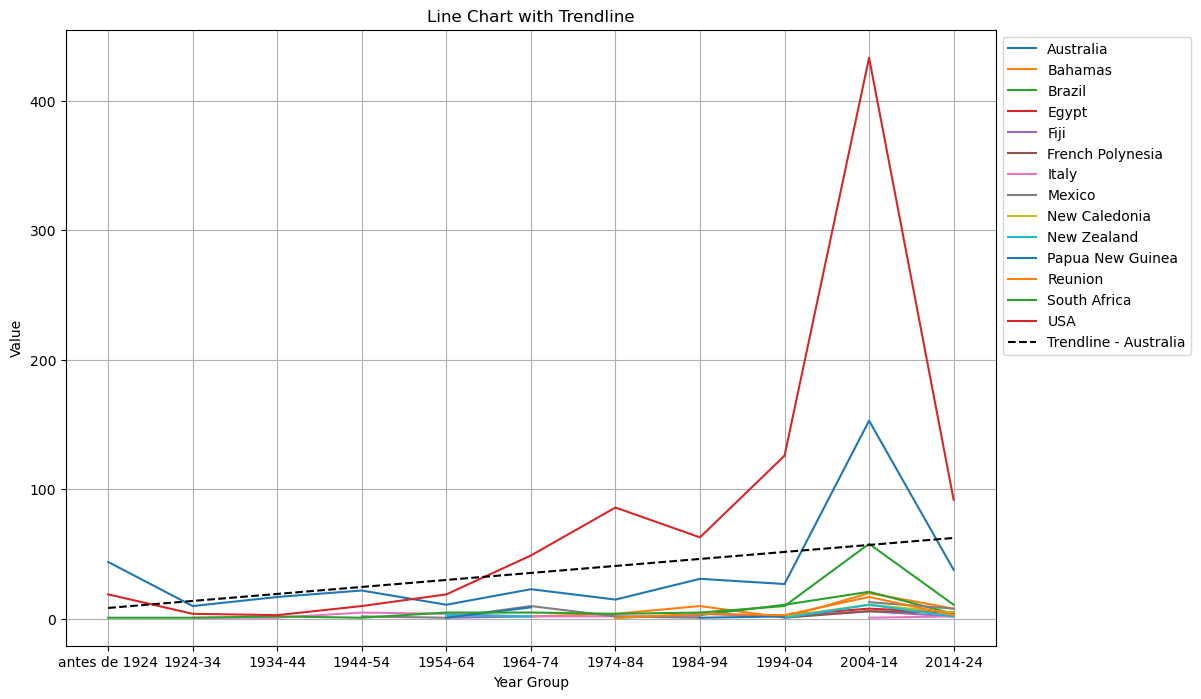

In [63]:
data = {
    'country': ['Australia', 'Bahamas', 'Brazil', 'Egypt', 'Fiji', 'French Polynesia', 'Italy', 'Mexico', 'New Caledonia', 'New Zealand', 'Papua New Guinea', 'Reunion', 'South Africa', 'USA'],
    'antes de 1924': [44.0, None, None, None, 2.0, None, None, None, None, 4.0, None, None, 1.0, 19.0],
    '1924-34': [10.0, None, None, None, None, None, 1.0, 1.0, None, None, None, None, 1.0, 4.0],
    '1934-44': [17.0, None, None, None, None, None, 1.0, None, None, None, 1.0, None, 2.0, 3.0],
    '1944-54': [22.0, None, 1.0, None, None, None, 5.0, 2.0, None, None, None, None, 1.0, 10.0],
    '1954-64': [11.0, None, None, None, 1.0, None, 4.0, 1.0, None, 3.0, 1.0, None, 5.0, 19.0],
    '1964-74': [23.0, 2.0, None, 1.0, 2.0, 2.0, 2.0, 10.0, None, 2.0, 9.0, None, 5.0, 49.0],
    '1974-84': [15.0, 4.0, 1.0, None, None, None, 2.0, 2.0, None, None, None, 1.0, 4.0, 86.0],
    '1984-94': [31.0, 10.0, 3.0, None, 4.0, None, 2.0, 1.0, None, None, 1.0, 4.0, 5.0, 63.0],
    '1994-04': [27.0, 1.0, 11.0, 3.0, 2.0, 1.0, None, None, 2.0, 1.0, 2.0, 3.0, 10.0, 126.0],
    '2004-14': [153.0, 20.0, 21.0, 8.0, 6.0, 6.0, 1.0, 13.0, 11.0, 11.0, None, 17.0, 58.0, 433.0],
    '2014-24': [38.0, 8.0, 4.0, 5.0, 2.0, 5.0, 2.0, 8.0, 5.0, 2.0, None, 3.0, 11.0, 92.0],
    'antes de 1924': [44.0, None, None, None, 2.0, None, None, None, None, 4.0, None, None, 1.0, 19.0]}
df = pd.DataFrame(data)
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], label=row['country'])
country_index = 0
x_values = np.arange(len(df.columns[1:]))
y_values = df.iloc[country_index, 1:].values.astype(float)
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x_values)
plt.plot(df.columns[1:], trendline, label=f'Trendline - {df.iloc[country_index]["country"]}', linestyle='--', color='black')
plt.xlabel('Year Group')
plt.ylabel('Value')
plt.title('Line Chart with Trendline')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [64]:

df_relacionado = dfcopy[['country', 'survived', 'year_group']]

df_relacionado = df_relacionado.dropna(subset=['country', 'survived', 'year_group'])

df_casos_por_pais = df_relacionado.groupby(['country', 'survived', 'year_group']).size().reset_index(name='count')

paises_mas_de_10_casos = df_casos_por_pais[df_casos_por_pais['count'] > 10]['country'].unique()

df_nuevo = dfcopy[dfcopy['country'].isin(paises_mas_de_10_casos)][['country', 'survived', 'year_group']]

print(df_nuevo)


           country   survived year_group
1          Bahamas         no    2014-24
2        Australia         no    2014-24
3     South Africa         no    2014-24
4              USA        yes    2014-24
5           Mexico        yes    2014-24
...            ...        ...        ...
6928     Australia        yes  undefined
6929     Australia        yes  undefined
6930     Australia        yes  undefined
6931           USA        yes  undefined
6934     Undefined  undefined  undefined

[5678 rows x 3 columns]


In [65]:
dfcopy["year_group"].unique()

array(['2014-24', 'undefined', '2004-14', '1994-04', '1974-84', '1984-94',
       '1964-74', '1954-64', '1944-54', 'antes de 1924', '1934-44',
       '1924-34'], dtype=object)

In [66]:
df_nuevo_otro = df_nuevo[df_nuevo['survived'] == 'yes'].groupby(['country', 'year_group']).filter(lambda x: len(x) > 10)
df_nuevo_otrono = df_nuevo[df_nuevo['survived'] == 'no'].groupby(['country', 'year_group']).filter(lambda x: len(x) > 10)

df_filtrado = df_nuevo_otro[df_nuevo_otro['survived'] == 'yes']

df_agrupado = df_filtrado.groupby(['country', 'year_group']).size().reset_index(name='count_yes')


df_filtradono = df_nuevo_otrono[df_nuevo_otrono['survived'] == 'no']

df_agrupadono = df_filtradono.groupby(['country', 'year_group']).size().reset_index(name='count_no')



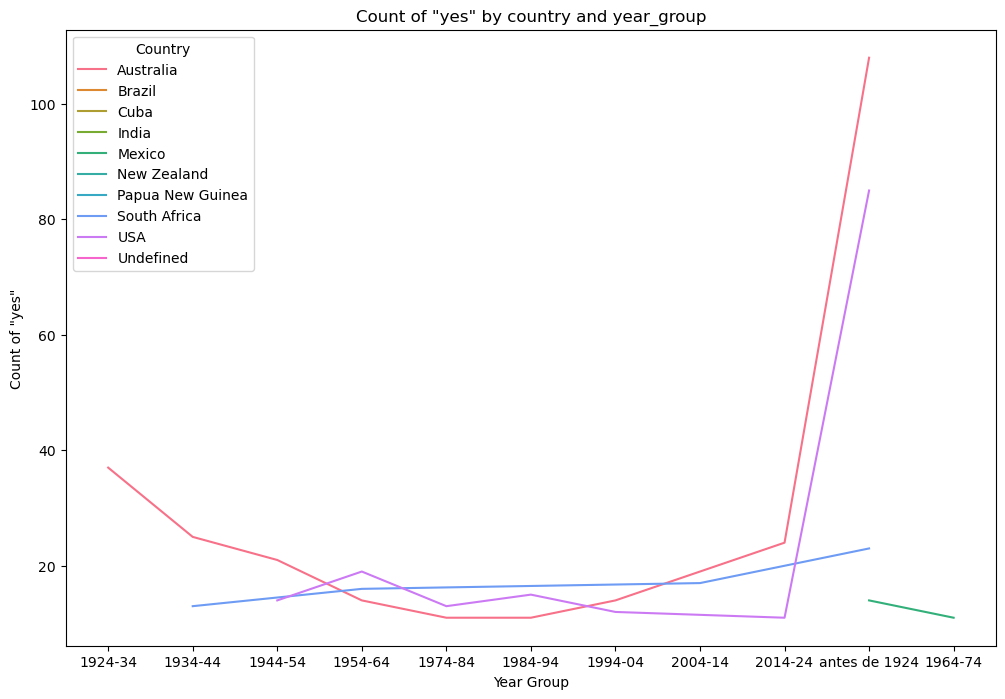

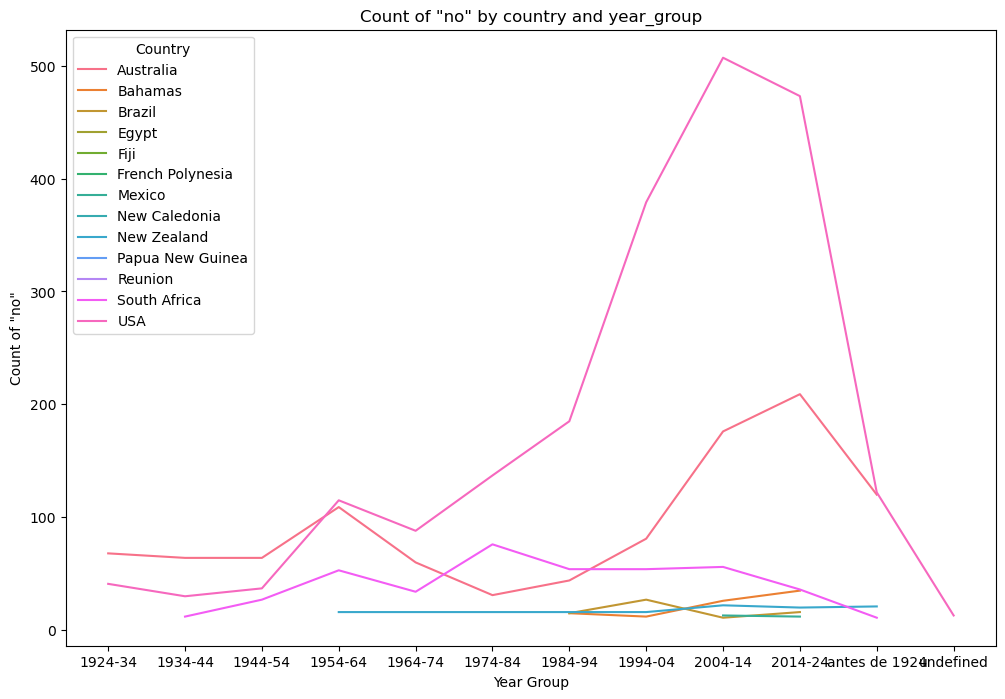

In [68]:
# Gráfico para 'survived' == 'yes'
plt.figure(figsize=(12, 8))
palette_yes = sns.color_palette("husl", n_colors=len(df_agrupado['country'].unique()))
sns.lineplot(x='year_group', y='count_yes', hue='country', data=df_agrupado, palette=palette_yes)
plt.title('Count of "yes" by country and year_group')
plt.xlabel('Year Group')
plt.ylabel('Count of "yes"')
plt.legend(title='Country')
plt.show()

# Gráfico para 'survived' == 'no'
plt.figure(figsize=(12, 8))
palette_no = sns.color_palette("husl", n_colors=len(df_agrupadono['country'].unique()))
sns.lineplot(x='year_group', y='count_no', hue='country', data=df_agrupadono, palette=palette_no)
plt.title('Count of "no" by country and year_group')
plt.xlabel('Year Group')
plt.ylabel('Count of "no"')
plt.legend(title='Country')
plt.show()
